## Load the libraries which will be used in this project

In [1]:
import re  # for the regular expressions
import nltk  # for text manipulation
import string  
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
test = pd.read_csv("test_tweets_anuFYb8.csv")
train = pd.read_csv("train_E6oV3lV.csv")

## Data Ingestion phase of the cleaning process of text data

In [4]:
train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [7]:
train.shape, test.shape

((31962, 3), (17197, 2))

### Let's have a glimpse of the data

In [8]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

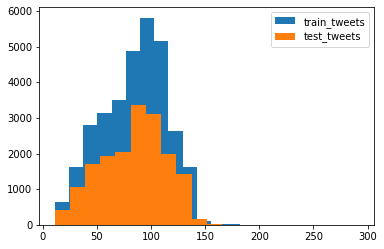

In [9]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

### We need to clean, but first, let's combine both train and test set.

In [10]:
combine = train.append(test, ignore_index=True)
combine.shape

(49159, 3)

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [12]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### Punctuation, Number, and Special Character remover

Here we replace everthin except characters and hashtags with spaces. The regular expression "[^a-zA-Z#]" means anything except alphabeths and '#

In [13]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("^a-zA-Z#", " ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [14]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [15]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

### Now we can normalize the tokenized tweets

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenize_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

### Let's stitch these tokens back together.

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

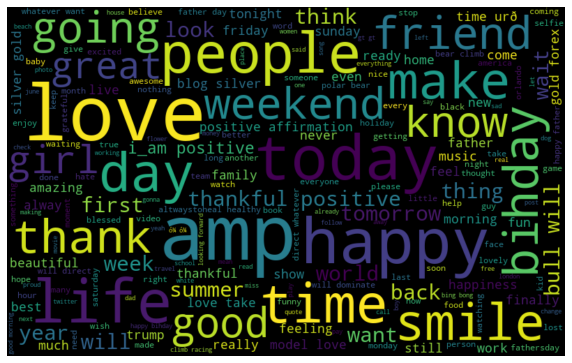

In [18]:
all_words = ' '.join([text for text in combine['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, 
max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

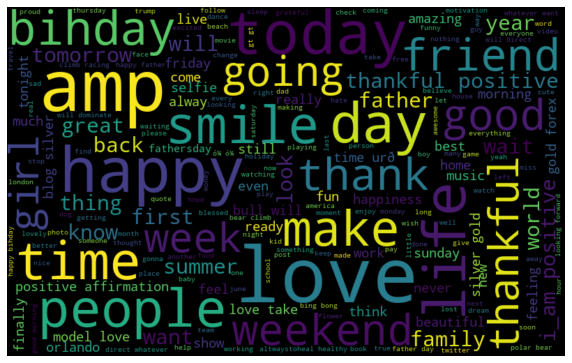

In [19]:
normal_words = ' '.join([text for text in combine['tidy_tweet'][combine['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

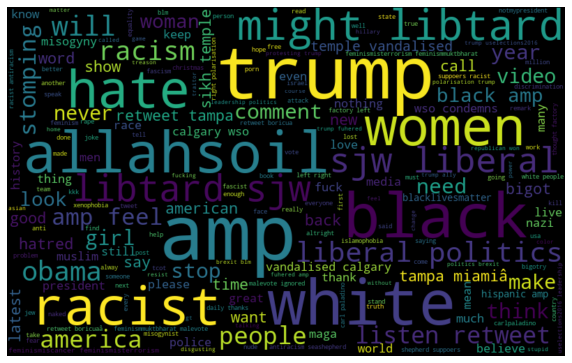

In [20]:
negative_words = ' '.join([text for text in combine['tidy_tweet'][combine['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, 
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    #Loop over the words in tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

In [22]:
# Extract hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combine['tidy_tweet'][combine['label'] == 0])

# Extract hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combine['tidy_tweet'][combine['label'] == 1])

# unresting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

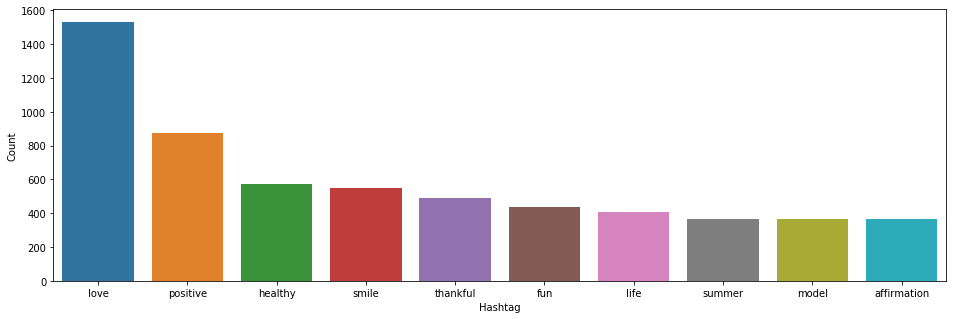

In [23]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                 'Count': list(a.values())})
#Selectint top 10 most frequent hashtags
d = d.nlargest(columns="Count", n=10)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

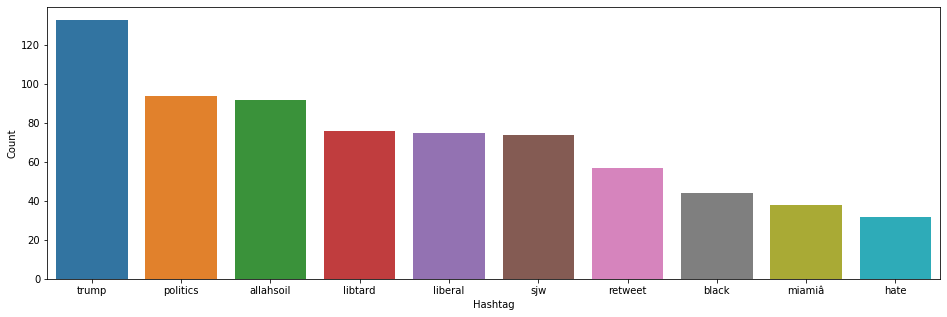

In [24]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns='Count', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y= "Count")
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, 
max_features=1000, stop_words='english')
# bag of words feature matrix
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])
bow.shape

(49159, 1000)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from smart_open import smart_open
import gensim

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, 
max_features=1000, stop_words='english')

#TF IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [27]:
!pip install --upgrade smart_open

Requirement already up-to-date: smart_open in c:\anaconda\lib\site-packages (4.2.0)


In [28]:
import os
import gensim
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split()) #tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, #desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg =1, # 1 for skip-gram model
            negative = 10, # for negative sampling
            workers = 2, #no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples=len(combine['tidy_tweet']), epochs=20)

(6667105, 8184140)

In [29]:
model_w2v.wv.most_similar(positive='dinner')

[('lamb', 0.6275740265846252),
 ('#tules', 0.6244915723800659),
 ('#toast', 0.6227443814277649),
 ('spaghetti', 0.6219537258148193),
 ('burritos', 0.6162759065628052),
 ('dining', 0.606437087059021),
 ('#womens', 0.6025078296661377),
 ('#pasta', 0.5992603302001953),
 ('#lovefood', 0.5983923077583313),
 ('students,', 0.5967056751251221)]

In [30]:
model_w2v.wv.most_similar(positive='trump')

[('phony.', 0.5855040550231934),
 ('suppoer.', 0.5806875228881836),
 ('fraud.', 0.5801138877868652),
 ('donald', 0.5739615559577942),
 ('sexist.', 0.5713770389556885),
 ('churchill', 0.568519115447998),
 ('businessman:', 0.5678555965423584),
 ('politician:', 0.5573058128356934),
 ('man:', 0.555037260055542),
 ('paladino', 0.5525486469268799)]

In [31]:
model_w2v['food'] # The length of the vector is 200

array([-0.64019316,  0.57452404, -0.39071333,  0.22831194,  0.12000633,
        0.07312119, -0.5672355 ,  0.5691797 , -0.18179114, -0.85592467,
       -0.06481785, -0.28245032, -0.33075297,  0.37314245,  0.03649632,
       -0.40383044, -0.08390913, -0.15017587,  0.40899384, -0.4894257 ,
       -0.80192167,  0.10038372,  0.10648776, -0.15283947, -0.48886108,
        0.6247539 , -0.11284403,  0.08016241,  0.22809379, -0.5680038 ,
       -0.31416023,  0.13381448, -0.33016565,  0.21773472, -0.01006315,
       -0.9369809 ,  0.09732063, -0.3566418 , -0.17713188, -0.11145209,
        0.0231855 ,  0.08933148,  0.41534105, -0.4903229 ,  0.11938939,
       -0.01895568, -0.13893157, -0.10839139, -0.02690946, -0.23947498,
       -0.73470867, -0.9927805 , -0.55735075, -0.20148559,  0.6666475 ,
       -0.09973849,  0.32048047,  0.4885715 ,  0.4224927 ,  0.5548964 ,
        0.11069015,  0.06959752, -1.2292517 ,  0.0700421 ,  0.1629579 ,
        0.07784874, -0.22175589, -0.19942111,  0.14133522, -0.43

In [32]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is nor=t in vocabulary
                continue
    if count != 0:
        vec /= count
    return vec

In [33]:
# preparing word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df.shape

(49159, 200)

In [34]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\anaconda\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Let's labelise and or tag each tkenised tweer with unique IDs, by using Gensim's LabeledSentence() function to implement doc2vec.

In [35]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', '#lyft', 'credit', "can't", 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fare', 'talking', 'before', 'they', 'leave.', 'chaos', 'disputes', 'when', 'they', 'there.', '#allshowandnogo'], tags=['tweet_5'])]

## Train doc2vec model

In [36]:
model_d2v = gensim.models.Doc2Vec(dm=1, #dm = 1 'distribution memory' model 
                                dm_mean=21, # dm = 1 fr using mean of the context word vectors
                                size=200, # no. of desired features
                                window=5, # width of the contwext window
                                negative=7, # if > 0 the negative sampling will be used
                                min_count=5, # Ignores all ords with total frequency lower than 2.
                                workers=3, # no. of cores
                                alpha=0.1, # learning rate
                                seed=23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples=len(combine['tidy_tweet']), epochs=15)

C:\anaconda\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 1261233.97it/s]


In [37]:
# Prepparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combine)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1, 200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

## Training the model as building models on the datasets with different features such as bags-of-words, word2vec, tf-idf & doc2vec

In [38]:
# Using Logistic Regression to train our model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
 
#bag-of-word features

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
x_train_bow, x_valid_bow, y_train, y_valid = train_test_split(train_bow, 
train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(x_train_bow, y_train) # training the model

prediction = lreg.predict_proba(x_valid_bow) # prediction on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

prediction_int = prediction_int.astype(np.int)


f1_score(y_valid, prediction_int) # calculating f1_score

0.5238907849829352

## Make prediction on test dataset and make submission file

In [39]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_lreg_bow.csv', index=False)
# submission

In [40]:
# tfidf features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
x_train_tfidf = train_tfidf[y_train.index] 
x_valid_tfidf = train_tfidf[y_valid.index]

In [41]:
lreg.fit(x_train_tfidf, y_train)
prediction_tfidf = lreg.predict_proba(x_valid_tfidf)
prediction_int_tfidf = prediction_tfidf[:,1] >= 0.3
prediction_int_tfidf = prediction_int_tfidf.astype(np.int)
f1_score(y_valid, prediction_int_tfidf) # calculating f1 score for the validtion set

0.5172109443954104

In [42]:
# Word2Vec Features
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
x_train_w2v = train_w2v.iloc[y_train.index,:]
x_valid_w2v = train_w2v.iloc[y_valid.index,:]


lreg.fit(x_train_w2v, y_train)
prediction_w2v = lreg.predict_proba(x_valid_w2v)
prediction_int_w2v = prediction_w2v[:,1] >= 0.3
prediction_int_w2v = prediction_int_w2v.astype(np.int)
f1_score(y_valid, prediction_int_w2v)

0.597460791635549

In [43]:
# doc2vec features
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]
x_train_d2v = train_d2v.iloc[y_train.index,:]
x_valid_d2v = train_d2v.iloc[y_valid.index,:]

lreg.fit(x_train_d2v, y_train)
prediction_d2v = lreg.predict_proba(x_valid_d2v)
prediction_int_d2v = prediction_d2v[:,1] >= 0.3
prediction_int_d2v = prediction_int_d2v.astype(np.int)
f1_score(y_valid, prediction_int_d2v)

0.32291666666666663

## Support Vector Machine algorithm

In [44]:
from sklearn import svm

#bag-of-words features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_bow, y_train)
prediction_svm = svc.predict_proba(x_valid_bow)
prediction_int_svm = prediction_svm[:,1] >= 0.3
prediction_int_svm = prediction_int_svm.astype(np.int)
f1_score(y_valid, prediction_int_svm)

0.5093833780160858

In [45]:
test_pred_svm = svc.predict_proba(test_bow)
test_pred_int_bow = test_pred_svm[:,1] >= 0.3
test_pred_int_bow = test_pred_int_bow.astype(np.int)
test['label'] = test_pred_int_bow
submission = test[['id','label']]
submission.to_csv('sub_svm_bow.csv', index=False)

In [46]:
#tfidf features

svc_tfidf = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_tfidf, y_train)

In [47]:
prediction_svm_tfidf = svc.predict_proba(x_train_tfidf)
prediction_int_svm_tfidf = prediction[:,1] >= 0.3
prediction_int_svm_tfidf = prediction_int_svm_tfidf.astype(np.int)
f1_score(y_valid, prediction_int_svm_tfidf)

0.5238907849829352

In [48]:
# word2vec features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_w2v, y_train)
prediction_svm_w2v = svc.predict_proba(x_valid_w2v)
prediction_svm_w2v_int = prediction_svm_w2v[:,1] >= 0.3
prediction_svm_w2v_int = prediction_svm_w2v_int.astype(np.int)
f1_score(y_valid, prediction_svm_w2v_int)

0.5955056179775282

In [49]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_d2v, y_train)
prediction_svm_d2v = svc.predict_proba(x_valid_d2v)
prediction_svm_d2v_int = prediction_svm_d2v[:,1] >= 0.3
prediction_svm_d2v_int = prediction_svm_d2v_int.astype(np.int)
# validation score
f1_score(y_valid, prediction_svm_d2v_int)

0.09218950064020487

## The use RandomForest for the data fitting


In [50]:
from sklearn.ensemble import RandomForestClassifier

# bag-of-words features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_bow, y_train)
prediction_rf = rf.predict(x_valid_bow)
# validation score
f1_score(y_valid, prediction_rf)

0.5052125100240576

In [51]:
# tf-idf
test_pred_bow = rf.predict(test_bow) 
test['label'] = test_pred
submission = test[['id', 'label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [52]:
# tf-idf
rf = RandomForestClassifier(n_estimators =400, random_state=11).fit(x_train_tfidf, y_train)
prediction_rf_tfidf = rf.predict(x_valid_tfidf)
f1_score(y_valid, prediction_rf_tfidf)

0.5146088595664468

In [53]:
# Word2Vec features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_w2v, y_train)
prediction_w2v = rf.predict(x_valid_w2v)
f1_score(y_valid, prediction_w2v)

0.4902807775377969

In [54]:
# Doc2Vec features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_d2v, y_train)
prediction_d2v = rf.predict(x_valid_d2v)
f1_score(y_valid, prediction_d2v)

0.08123249299719887

## Extreme Gradient Boosting (xgBoost) model fitting with available features

In [55]:
from xgboost import XGBClassifier

#Bag-of-Words Features
xgb_model = XGBClassifier(maxdepth=6, n_estimators=1000).fit(x_train_bow, y_train)
prediction_xgb = xgb_model.predict(x_valid_bow)
f1_score(y_valid, prediction_xgb)

0.4602851323828921

In [56]:
# tfidf features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(x_train_tfidf, y_train)
prediction_xgb_tfidf = xgb.predict(x_valid_tfidf)
f1_score(y_valid, prediction_xgb_tfidf)

0.5

In [57]:
# Word2vec Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(x_train_w2v, y_train)
prediction_xgb_w2v = xgb.predict(x_valid_w2v)
f1_score(y_valid, prediction_xgb_w2v)

0.620817843866171

In [58]:
# Doc2Vec Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(x_train_d2v, y_train)
prediction_xgb_d2v = xgb.predict(x_valid_d2v)
f1_score(y_valid, prediction_xgb_d2v)

0.3552036199095023

## fine tuning the xgboost parameter especially w2v as the model that gave us highest score.

In [59]:
import xgboost as xgb

In [60]:
#DMatrix as parameter with both features and target
d_train = xgb.DMatrix(x_train_w2v, label=y_train)
d_valid = xgb.DMatrix(x_valid_w2v, label=y_valid)
d_test = xgb.DMatrix(test_w2v)

In [61]:
# Parameters that are going to tune
params = {
    'objective':'binary:logistic',
    'max_deoth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample':1,
    'colsample_bytree': 1
}

In [62]:
#Prepare the customer evaluation to calculate f1_score
def custom_eval(preds, d_train):
    labels = d_train.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

### General approach for tuning

In [63]:
#Tuning max_depth and min_child_weight
griedsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6, 10)
        for min_child_weight in range(5, 8)
    
]

max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in griedsearch_params:
    print("CV with max_depth={}, min__child_weight={}".format(
                    max_depth,
                    min_child_weight))
    # update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Cross-validation
    cv_results = xgb.cv(dtrain=d_train, 
                        params=params, 
                        nfold=3,
                    num_boost_round=50,
                        early_stopping_rounds=10,
                        feval=custom_eval,
                        #metrics="rmse", 
                        maximize=True, 
                        seed=123
                       )
    
#Finding the best F1 Score

mean_f1 = cv_results['test-f1_score-mean'].max()


boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds.".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth, min_child_weight)
    
    
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

# CV with max_depth=6, min_child_weight=5


CV with max_depth=6, min__child_weight=5
CV with max_depth=6, min__child_weight=6
CV with max_depth=6, min__child_weight=7
CV with max_depth=7, min__child_weight=5
CV with max_depth=7, min__child_weight=6
CV with max_depth=7, min__child_weight=7
CV with max_depth=8, min__child_weight=5
CV with max_depth=8, min__child_weight=6
CV with max_depth=8, min__child_weight=7
CV with max_depth=9, min__child_weight=5
CV with max_depth=9, min__child_weight=6
CV with max_depth=9, min__child_weight=7
	F1 Score 0.619629 for 48 rounds.
Best params: 9, 7, F1 Score: 0.619629


In [65]:
#Updating the max_depth and min_child_weight parameters
params['max_depth'] = 8
params['min_child_weight'] = 6

## Tuning subsample and colsample

In [67]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5, 10)]
    for colsample in [i/10. for i in range(5,10)]
]

max_f1 = 0.
best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                                subsample,
                                colsample))
    
    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
            params=params,
            dtrain=d_train,
            feval = custom_eval,
            num_boost_round=200,
            maximize=True,
            seed=16,
            nfold=5,
            early_stopping_rounds=10)
    
    # Ffinding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)
        
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.611119 for 25 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.611119 for 25 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.611119 for 25 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.611119 for 25 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.611119 for 25 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6347328 for 61 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6347328 for 61 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6347328 for 61 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6347328 for 61 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6347328 for 61 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6336094 for 46 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6336094 for 46 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6336094 for 46 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.6336094 for 46 rounds
CV with sub

In [68]:
# Updating the susample and coldsample_bytree

params['subsample'] = .9
params['colsample_bytree'] = .5

In [ ]:
# Now let's tune the learning rate

max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    #Update ETA
    params['eta'] = eta
    
    # Run CV
    cv_results = xgb.cv(
            params=params,
            dtrain=d_train,
            feval=custom_eval,
            num_boost_round=1000,
            maximize=True,
            seed=16,
            nfold=5,
            early_stopping_rounds=20
    )
    
    # Finding best f1 score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        mean_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))


In [ ]:
# List look at the final list of tuned parameters

params

{
    'colsample': 0.9,
    'colsample_bytree': 0.5, 'eta': 0.1,
    'max_depth': 8, 'min_child_weight': 6,
    'objective': 'binary:logistic',
    'subsample': 0.9
}

xgb_model = xgb.train(
    params,
    dtrain,
    feval=custom_eval,
    num_boost_round=1000,
    maximize=True,
    evals=[(d_valid, 'Validation')],
    early_stopping_rounds=10)

In [ ]:
#Let's prepare one final submission file

test_pred = xgb_model.predict(d_test) 
test['label'] = (test_pred >= 0.3).astype(np.int)
submission = test[['id','label']]
submission.tocsv('sub_xgb_w2v_finetuned.csv', index=False)

In [74]:
x = { 'one':1, 'two':2, 'three':3, 'four':4, 'five':5 }
x['two'] = 7
for k, v in x.items():
    print("k: {} v: {}".format(k, v))

k: one v: 1
k: two v: 7
k: three v: 3
k: four v: 4
k: five v: 5


In [98]:
a = True
b = False
x = ('one', 'two', 'three')
y = ['one', 'two', 'four']
if a is b:
    print('Expression is true')
else:
    print('Expression is not true')

Expression is not true


In [102]:
secret = 'swordfish'
pw = ''
auth = False
count = 0
max_attempt = 5

while pw != secret:
    count += 1
    if count > max_attempt:break
    if count == 3: continue
    pw = input(f"{count}: What is the secret word? ")
else:
    auth = True
    
print("Authorized" if auth else "Calling the FBI... ")

1: What is the secret word? 8
2: What is the secret word? 5
4: What is the secret word? 0
5: What is the secret word? 1
Calling the FBI... 


In [106]:
animals = ( 'bear', 'bunny', 'dog', 'velociraptor', 'cat' )

for pet in animals:
    if pet == 'dog':continue
    if pet == 'velociraptor': pass
    print(pet)
else:
    print('That is all of the animals')

bear
bunny
velociraptor
cat
That is all of the animals
